<a href="https://colab.research.google.com/github/LPValente/TensorFlow2.0/blob/main/TF2_0_CIFAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install TensorFlow
!pip install -q tensorflow-gpu==2.0.0-betal
import tensorflow as tf
print(tf.__version__)

ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==2.0.0-betal (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.12.0)
ERROR: No matching distribution found for tensorflow-gpu==2.0.0-betal
2.12.0


In [ ]:
# additional imports

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D
from tensorflow.keras.models import Model

In [ ]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape:", x_train.shape)
print("y_train.shape:", y_train.shape)

170498071/170498071 [==============================] - 13s 0us/step
x_train.shape: (50000, 32, 32, 3)
y_train.shape: (50000,)


In [ ]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [ ]:
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides = 2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides = 2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides = 2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i,x)

In [ ]:
# Compile and fit
# Note: make sure you are using the GPU for this!
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 19s 5ms/step - loss: 1.5750 - accuracy: 0.4248 - val_loss: 1.3454 - val_accuracy: 0.5096
Epoch 2/15
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2793 - accuracy: 0.5412 - val_loss: 1.1645 - val_accuracy: 0.5784
Epoch 3/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1551 - accuracy: 0.5863 - val_loss: 1.0285 - val_accuracy: 0.6372
Epoch 4/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0676 - accuracy: 0.6192 - val_loss: 1.0501 - val_accuracy: 0.6240
Epoch 5/15
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0032 - accuracy: 0.6412 - val_loss: 0.9885 - val_accuracy: 0.6526
Epoch 6/15
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9507 - accuracy: 0.6609 - val_loss: 0.8989 - val_accuracy: 0.6804
Epoch 7/15
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8980 - accuracy: 0.6798 - val_loss: 0.9171 - val_accuracy

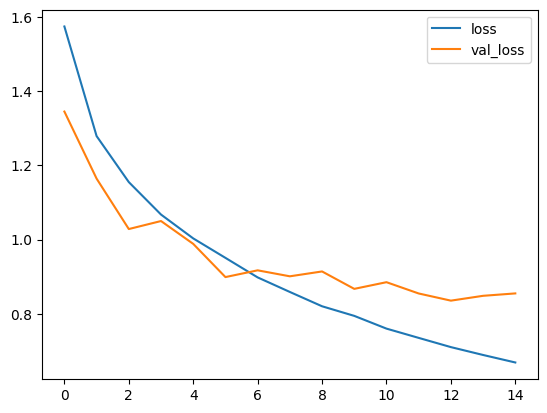

In [ ]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

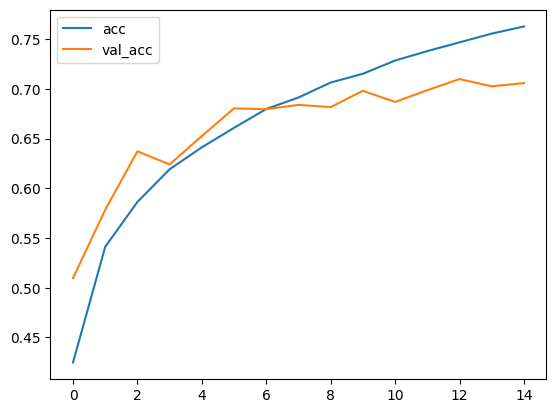

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label = 'acc')
plt.plot(r.history['val_accuracy'], label = 'val_acc')
plt.legend()

313/313 [==============================] - 1s 2ms/step
Confusion matrix, without normalization
[[779  32  25   8  12   4   4  10  96  30]
 [ 14 865   5   7   2   3   5   1  23  75]
 [ 99  10 579  69  75  74  37  31  17   9]
 [ 35  18  71 521  55 186  47  30  16  21]
 [ 27   7  87  75 622  64  33  65  17   3]
 [ 18   6  59 175  48 609  16  53   9   7]
 [ 12  15  50  76  33  42 742   5  22   3]
 [ 23  10  27  41  53  60   3 763   5  15]
 [ 67  38  14  15   6   3   2   6 833  16]
 [ 53 109   8   6   7  10   6  25  31 745]]


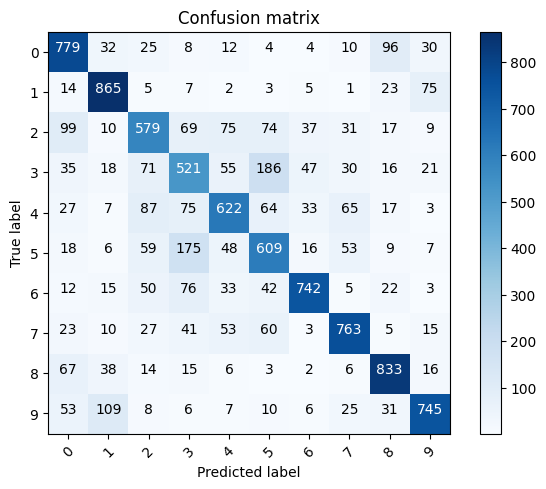

In [ ]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting 'normalize=True'
  """
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix, without normalization")

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
    
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [ ]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

Text(0.5, 1.0, 'True label: cat Predicted: dog')

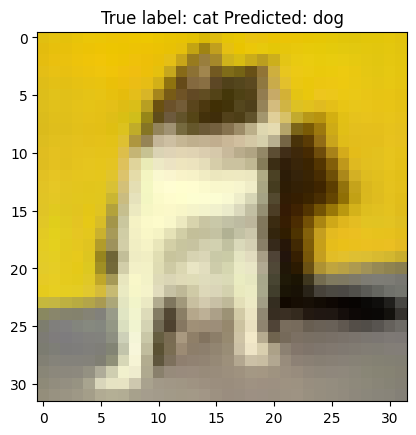

In [ ]:
# Show some misclassified examples
# TODO: add label names
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))